## Regresión Logística

# Miguel Ángel Villamil Huertas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
dato = pd.read_csv('./heart_cleveland_upload.csv')
dato.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [5]:
dato.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de dato faltantes y atípicos')

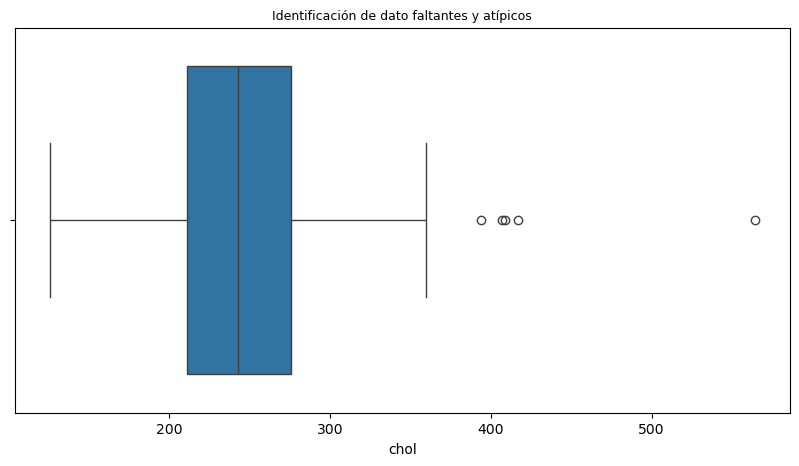

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x=dato['chol'])
plt.title('Identificación de dato faltantes y atípicos', fontsize=9)

In [7]:
print("Cantidad de registros en age: ", dato['age'].isin([0]).sum())
print("Cantidad de registros en sex: ", dato['sex'].isin([0]).sum())
print("Cantidad de registros en cp: ", dato['cp'].isin([0]).sum())
print("Cantidad de registros en trestbps: ", dato['trestbps'].isin([0]).sum())
print("Cantidad de registros en chol: ", dato["chol"].isin([0]).sum())
print("Cantidad de registros en fbs: ", dato["fbs"].isin([0]).sum())
print("Cantidad de registros en restecg: ", dato["restecg"].isin([0]).sum())
print("Cantidad de registros en thalach: ", dato["thalach"].isin([0]).sum())
print("Cantidad de registros en exang: ", dato["exang"].isin([0]).sum())
print("Cantidad de registros en oldpeak: ", dato["oldpeak"].isin([0]).sum())
print("Cantidad de registros en slope: ", dato["slope"].isin([0]).sum())
print("Cantidad de registros en ca: ", dato["ca"].isin([0]).sum())
print("Cantidad de registros en thal: ", dato["thal"].isin([0]).sum())
print("Cantidad de registros en condition: ", dato["condition"].isin([0]).sum())

Cantidad de registros en age:  0
Cantidad de registros en sex:  96
Cantidad de registros en cp:  23
Cantidad de registros en trestbps:  0
Cantidad de registros en chol:  0
Cantidad de registros en fbs:  254
Cantidad de registros en restecg:  147
Cantidad de registros en thalach:  0
Cantidad de registros en exang:  200
Cantidad de registros en oldpeak:  96
Cantidad de registros en slope:  139
Cantidad de registros en ca:  174
Cantidad de registros en thal:  164
Cantidad de registros en condition:  160


In [8]:
dato["age"]=dato["age"].replace(0,dato["age"].mean())
dato["sex"]=dato["sex"].replace(0,dato["sex"].mean())
dato["cp"]=dato["cp"].replace(0,dato["cp"].mean())
dato["trestbps"]=dato["trestbps"].replace(0,dato["trestbps"].mean())
dato["chol"]=dato["chol"].replace(0,dato["chol"].mean())
dato["fbs"]=dato["fbs"].replace(0,dato["fbs"].mean())
dato["restecg"]=dato["restecg"].replace(0,dato["restecg"].mean())
dato["thalach"]=dato["thalach"].replace(0,dato["thalach"].mean())
dato["exang"]=dato["exang"].replace(0,dato["exang"].mean())
dato["oldpeak"]=dato["oldpeak"].replace(0,dato["oldpeak"].mean())
dato["slope"]=dato["slope"].replace(0,dato["slope"].mean())
dato["ca"]=dato["ca"].replace(0,dato["ca"].mean())
dato["thal"]=dato["thal"].replace(0,dato["thal"].mean())
dato["condition"]=dato["condition"].replace(0,dato["condition"].mean())

Text(0.5, 1.0, 'Identificación de dato faltantes y atípicos')

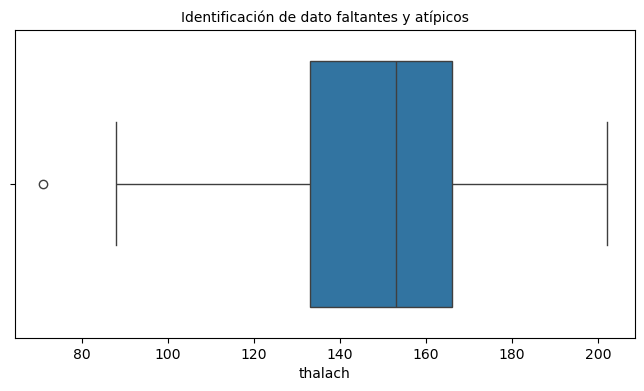

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=dato['thalach'])
plt.title('Identificación de dato faltantes y atípicos', fontsize=10)

In [10]:
nivel_min=20
nivel_max=600
total_atipico=((dato["oldpeak"]<nivel_min)&(dato["oldpeak"]<nivel_max)).sum()
print("El total de dato es {}".format(total_atipico))

El total de dato es 297


In [11]:
dato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  condition  297 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 32.6 KB


In [12]:
dato[["condition"]].head()

,condition
0,0.461279
1,0.461279
2,0.461279
3,1.000000
4,0.461279


In [13]:
x= dato.drop("condition", axis=1)
y= dato["condition"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state= 0)

In [14]:
# modelo_regresion = LogisticRegression(solver = "binary")
# modelo_regresion.fit (x_train, y_train)

#prediccion = modelo_regresion.predict(x_test) 

In [15]:
print (y_test)

185    1.000000
157    1.000000
110    0.461279
39     0.461279
198    1.000000
         ...   
278    0.461279
163    1.000000
137    0.461279
33     1.000000
246    1.000000
Name: condition, Length: 75, dtype: float64


In [16]:
print (x_test)

     age       sex   cp  trestbps  chol       fbs   restecg  thalach  \
185   62  0.676768  3.0       140   268  0.144781  2.000000      160   
157   70  1.000000  3.0       145   174  0.144781  0.996633      125   
110   54  0.676768  2.0       135   304  1.000000  0.996633      170   
39    56  1.000000  1.0       130   221  0.144781  2.000000      163   
198   60  1.000000  3.0       130   206  0.144781  2.000000      132   
..   ...       ...  ...       ...   ...       ...       ...      ...   
278   45  1.000000  3.0       115   260  0.144781  2.000000      185   
163   67  1.000000  3.0       100   299  0.144781  2.000000      125   
137   44  0.676768  2.0       108   141  0.144781  0.996633      175   
33    57  0.676768  1.0       130   236  0.144781  2.000000      174   
246   54  1.000000  3.0       110   239  0.144781  0.996633      126   

        exang   oldpeak     slope        ca      thal  
185  0.326599  3.600000  2.000000  2.000000  0.835017  
157  1.000000  2.600000

In [17]:
print (x_train)

     age       sex   cp  trestbps  chol       fbs   restecg  thalach  \
234   56  0.676768  3.0       200   288  1.000000  2.000000      133   
82    66  0.676768  2.0       146   278  0.144781  2.000000      152   
36    56  1.000000  1.0       120   240  0.144781  0.996633      169   
237   56  1.000000  3.0       132   184  0.144781  2.000000      105   
133   47  1.000000  2.0       108   243  0.144781  0.996633      152   
..   ...       ...  ...       ...   ...       ...       ...      ...   
291   40  1.000000  3.0       110   167  0.144781  2.000000      114   
195   61  0.676768  3.0       130   330  0.144781  2.000000      169   
170   65  0.676768  3.0       150   225  0.144781  2.000000      114   
135   46  0.676768  2.0       142   177  0.144781  2.000000      160   
293   39  1.000000  3.0       118   219  0.144781  0.996633      140   

        exang   oldpeak     slope        ca      thal  
234  1.000000  4.000000  2.000000  2.000000  2.000000  
82   0.326599  1.055556

In [18]:
print (y_train)

234    1.000000
82     0.461279
36     0.461279
237    1.000000
133    1.000000
         ...   
291    1.000000
195    1.000000
170    1.000000
135    0.461279
293    1.000000
Name: condition, Length: 222, dtype: float64
